In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cloud_path = '/content/gdrive/MyDrive/0.competition/dataset/'

path = cloud_path

labeled = pd.read_csv(path + 'cn7_labeled_with_reason.csv',index_col=0)

In [ ]:
labeled.Reason.value_counts()

None      6697
초기허용불량      20
가스          13
미성형          6
Name: Reason, dtype: int64

In [ ]:
#Reason별로 짤라야한다.

#1. X group
labeled_initial = labeled[(labeled['Reason']=='초기허용불량') | (labeled['Reason']=='None')]
labeled_initial = labeled_initial.drop(columns={'Reason'})

#2. Y group
labeled_gas = labeled[(labeled['Reason']=='가스') | (labeled['Reason']=='None')]
labeled_gas = labeled_gas.drop(columns={'Reason'})

#3. Z group
labeled_unplastic = labeled[(labeled['Reason']=='미성형') | (labeled['Reason']=='None')]
labeled_unplastic = labeled_unplastic.drop(columns={'Reason'})

labeled = labeled.drop(columns={'Reason'})

In [ ]:
#각자 t-SNE 해봅시다.
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA, IncrementalPCA, LatentDirichletAllocation
from sklearn.manifold import TSNE


def smote(X, Y):
  oversample = ADASYN(sampling_strategy='auto', random_state=None, n_neighbors=5, n_jobs=None)
  X, Y = oversample.fit_resample(X, Y) #X, Y = oversample.fit_resample(X, Y.ravel())    
  return pd.DataFrame(X), pd.DataFrame(Y)

def process(labeled, on = False):
  X = labeled.loc[:, labeled.columns!='LABEL']
  Y = labeled['LABEL']
  Y = pd.DataFrame(Y)
  #X = scaling(X)
  if on is True:
    X, Y = smote(X, Y)
  print(X.shape)
  print(Y.shape)
  print(Y.value_counts())
  draw_tsne(X, Y)

def draw_tsne(X, Y):
  tsne = TSNE(n_components=2)
  x_tsne = tsne.fit_transform(X)

  plt.figure(figsize=(15,5)) 
  sizes = pd.Series(Y['LABEL']+1).pow(5) # represent fraud with bigger point
  plt.scatter(x_tsne[:, 0], x_tsne[:, 1], s=sizes, c=Y['LABEL'].values)
  plt.tight_layout()
  plt.show()

In [ ]:
on = True

(6736, 24)
(6736, 1)
LABEL
0        6697
1          39
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


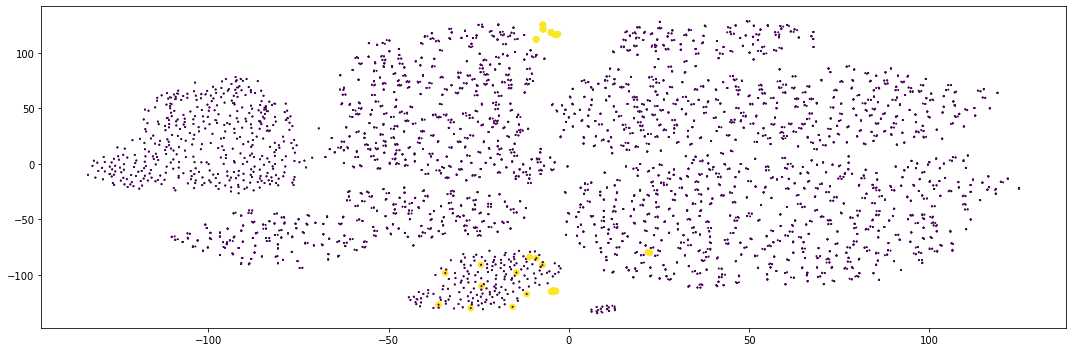

In [ ]:
process(labeled)

(6717, 24)
(6717, 1)
LABEL
0        6697
1          20
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


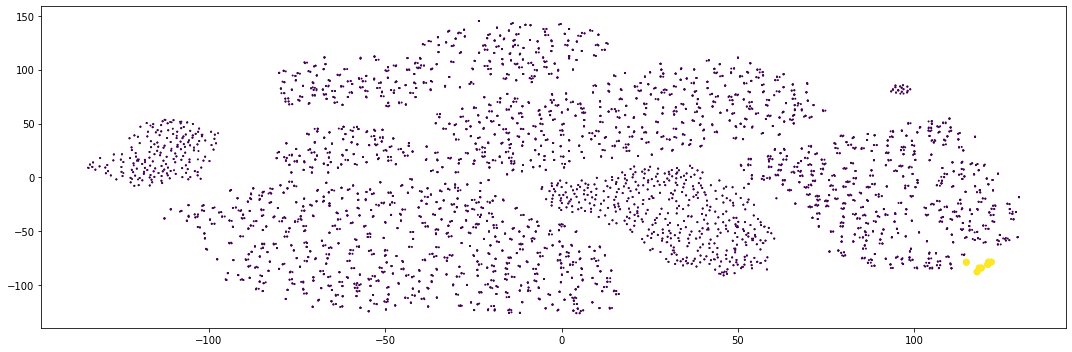

In [ ]:
process(labeled_initial)

(6710, 24)
(6710, 1)
LABEL
0        6697
1          13
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


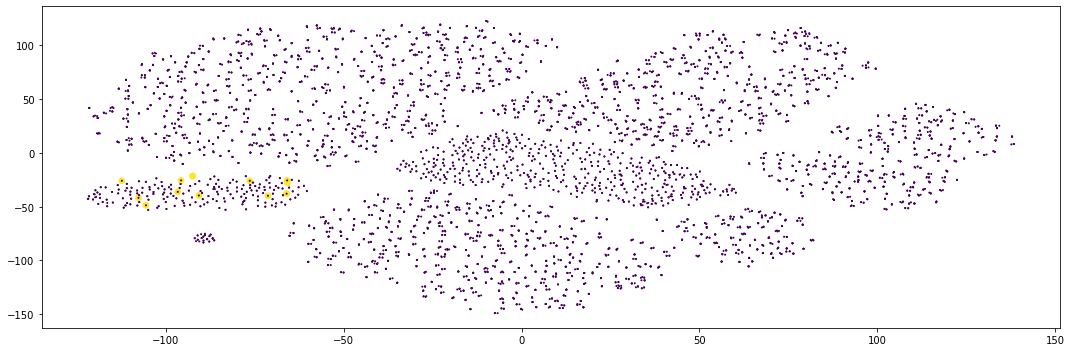

In [ ]:
process(labeled_gas)

(6703, 24)
(6703, 1)
LABEL
0        6697
1           6
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


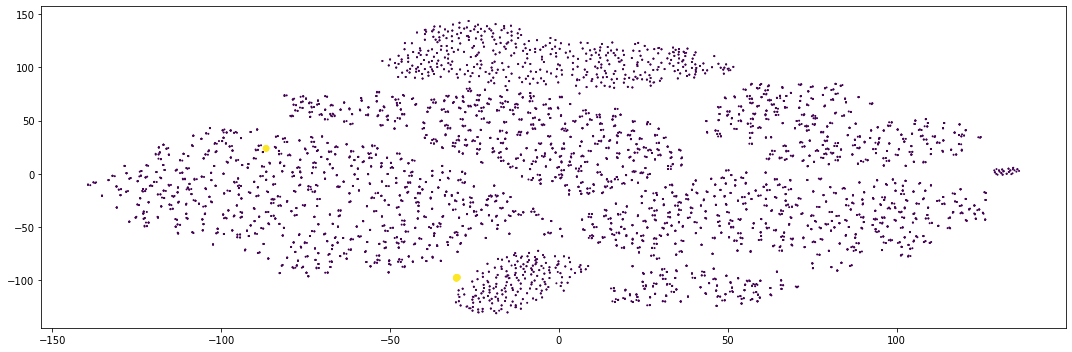

In [ ]:
process(labeled_unplastic)

# Compare Oversampling

(13392, 24)
(13392, 1)
LABEL
0        6697
1        6695
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


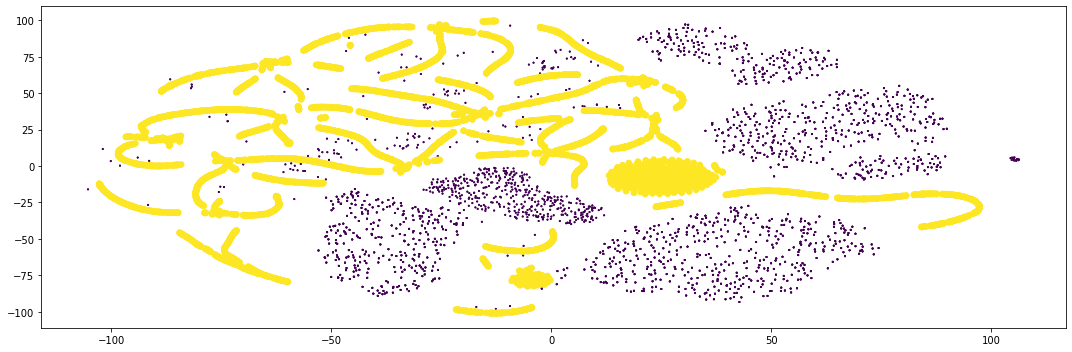

In [ ]:
process(labeled, on)

(13393, 24)
(13393, 1)
LABEL
0        6697
1        6696
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


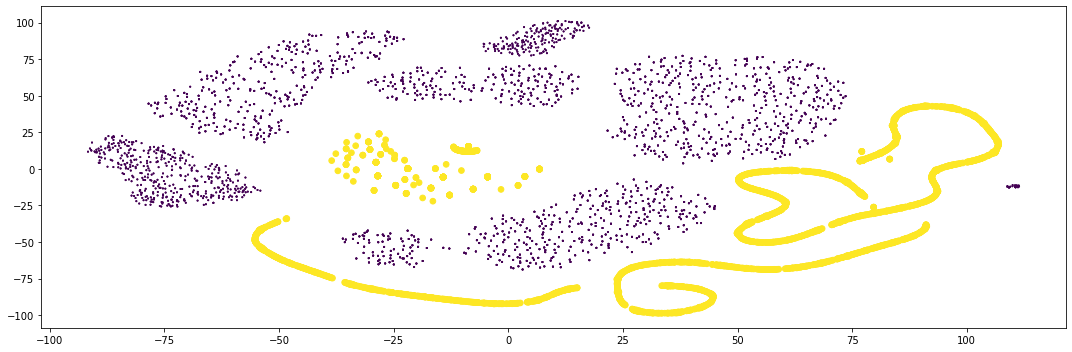

In [ ]:
process(labeled_initial, on)

(13396, 24)
(13396, 1)
LABEL
1        6699
0        6697
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


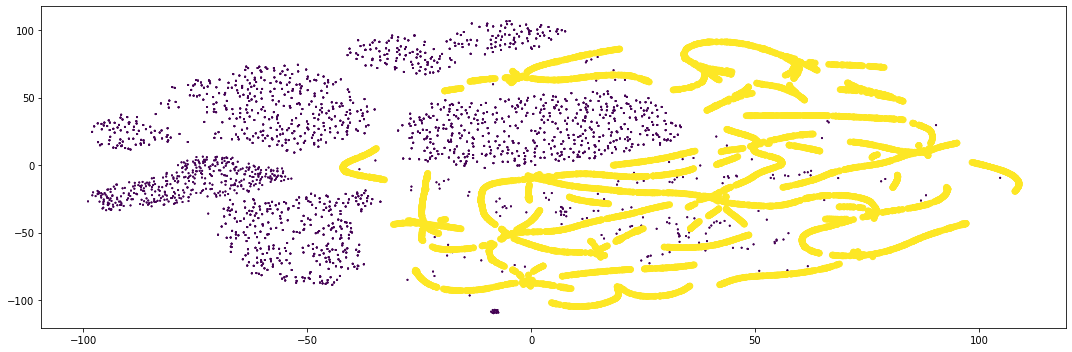

In [ ]:
process(labeled_gas, on)

(13393, 24)
(13393, 1)
LABEL
0        6697
1        6696
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


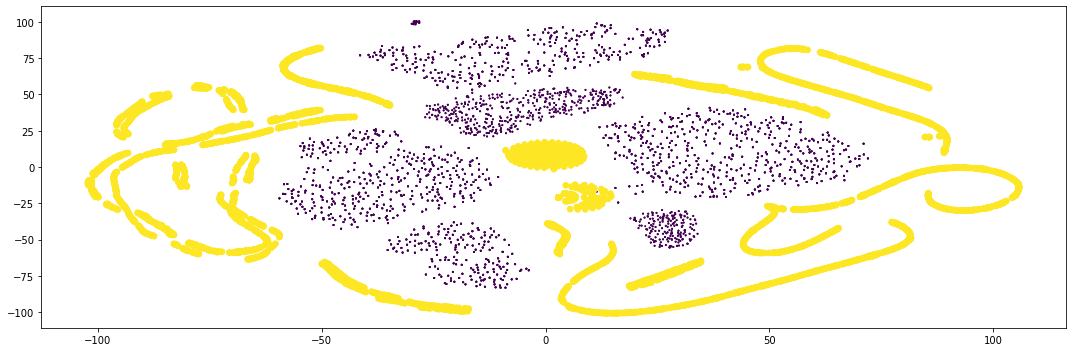

In [ ]:
process(labeled_unplastic, on)